Simple Linear Regression. Minimal example

In [1]:
# We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.
import numpy as np

# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Generate random input data to train on

In [2]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
inputs = np.column_stack((xs,zs))

# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
print (inputs.shape)

(1000, 2)


In [3]:
xs

array([[-3.48535167e+00],
       [-2.66982593e+00],
       [ 4.99618695e+00],
       [-2.04358303e+00],
       [-4.70530868e+00],
       [-7.66293217e+00],
       [-3.29769354e+00],
       [-2.98808913e-01],
       [ 7.86355029e+00],
       [ 3.69112237e+00],
       [-8.33494602e-02],
       [ 2.39793434e+00],
       [ 6.78847299e+00],
       [-7.68639744e+00],
       [ 1.80107642e+00],
       [-4.00742279e+00],
       [-5.01166487e-01],
       [ 2.35741517e+00],
       [-2.95231301e+00],
       [-4.94128406e+00],
       [ 6.38012774e-01],
       [-7.14586754e+00],
       [ 8.87156599e+00],
       [-6.83786116e+00],
       [-2.29123798e+00],
       [-8.64906113e+00],
       [ 4.93641214e-01],
       [ 1.19560811e-01],
       [ 1.65869396e+00],
       [ 5.12151621e+00],
       [ 8.90347113e-01],
       [ 8.68356129e-01],
       [-4.78194313e+00],
       [ 4.02891791e+00],
       [-8.31812524e+00],
       [-2.69332259e+00],
       [-4.99563070e+00],
       [-9.96232998e-02],
       [ 4.4

In [4]:
zs

array([[ 2.58173094e+00],
       [-7.64789500e+00],
       [ 8.37118717e+00],
       [ 9.05497627e-02],
       [ 3.40740809e+00],
       [-5.91767468e+00],
       [ 5.86412283e-01],
       [-1.61159443e+00],
       [ 4.73059815e+00],
       [ 3.88274886e+00],
       [ 3.66950511e+00],
       [ 3.59443230e+00],
       [ 4.41269628e+00],
       [-8.28268194e+00],
       [-4.23865501e+00],
       [ 6.07869565e+00],
       [ 1.47568157e+00],
       [-4.67652769e+00],
       [ 5.71747950e+00],
       [ 1.85900141e+00],
       [-1.95627265e+00],
       [ 8.80228653e+00],
       [-7.20144465e+00],
       [-3.32958439e+00],
       [ 6.80183862e+00],
       [ 5.55593378e+00],
       [-3.15512043e+00],
       [ 3.28383605e+00],
       [-6.02269188e+00],
       [ 7.56228426e+00],
       [ 1.85505182e+00],
       [ 2.60577191e+00],
       [-6.28630652e+00],
       [ 3.61489503e+00],
       [-7.49922153e+00],
       [ 7.19397123e+00],
       [-7.84369738e+00],
       [-1.03596219e+00],
       [-8.7

Generate the targets we will aim at

In [5]:
# We want to "make up" a function, use the ML methodology, and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets just in case. It should be n x m, where m is the number of output variables, so 1000 x 1.
print (targets.shape)

(1000, 1)


Plot the training data

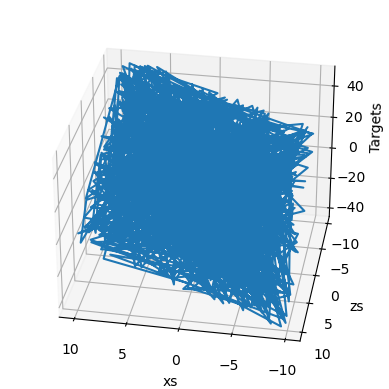

In [7]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,1)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

Initialize variables

In [8]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[-0.04725941]
 [-0.05117778]]
[0.08801372]


Set a learning rate

In [9]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

Train the model

In [13]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# The proper number of iterations is something we will talk about later on, but generally
# a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# keep in mind that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.
for i in range (100):
    
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    deltas = outputs - targets
        
    # We are considering the L2-norm loss, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print (loss)
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    deltas_scaled = deltas / observations
    
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

0.3717636216952162
0.3634215514054232
0.35540977757862674
0.34771522243561015
0.3403253259995796
0.33322802559426357
0.32641173615376345
0.31986533131202044
0.3135781252410212
0.3075398552081086
0.3017406648239177
0.29617108795359126
0.2908220332650201
0.2856847693888772
0.2807509106662311
0.2760124034604626
0.2714615130111569
0.26709081080849434
0.2628931624675479
0.2588617160826811
0.25498989104304665
0.25127136729092364
0.24770007500535876
0.24427018469427653
0.24097609767888314
0.2378124369548288
0.2347740384152175
0.23185594242113053
0.22905338570591022
0.22636179359998074
0.22377677256352618
0.2212941030148264
0.21890973244254852
0.2166197687907516
0.21442047410580659
0.2123082584348582
0.21027967396587344
0.20833140939970907
0.20646028454501095
0.20466324512712442
0.20293735780254038
0.2012798053707394
0.19968788217561895
0.19815898968899723
0.19669063226898248
0.19528041308628755
0.19392603021183696
0.192625272859281
0.19137601777628657
0.1901762257787089
0.18902393842198967
0.

Print weights and biases and see if we have worked correctly.

In [14]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be convergING. So more iterations are needed.

[[ 2.00167777]
 [-3.00125551]] [4.90329386]


Plot last outputs vs targets

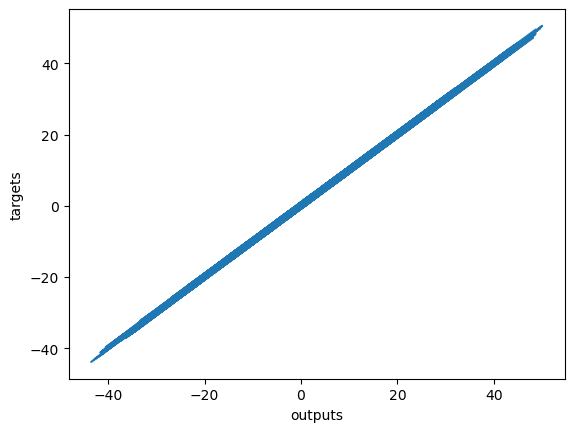

In [15]:
# We print the outputs and the targets in order to see if they have a linear relationship.
# Again, that's not needed. Moreover, in later lectures, that would not even be possible.
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()